## Libs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

C:\Users\Artur\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Test generate initial data

In [2]:
#for valid
for n in [11,51,101,201,501,1001,2001,10001]:

    b=(n-1)*0.1 #width % of L

    L=[i/(n-1) for i in range(0,n)]
    V=[1 if i in range(1,int(b)+1) else 0 for i in range(0,n) ]
    print(fr'Доля 1 для {n}:',np.round(100*V.count(1)/len(V),3),V.count(1))

Доля 1 для 11: 9.091 1
Доля 1 для 51: 9.804 5
Доля 1 для 101: 9.901 10
Доля 1 для 201: 9.95 20
Доля 1 для 501: 9.98 50
Доля 1 для 1001: 9.99 100
Доля 1 для 2001: 9.995 200
Доля 1 для 10001: 9.999 1000


Доля 1: 9.901


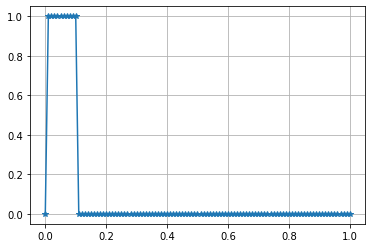

In [3]:
n=101
L=1
T=1
kurant=0.5


h=L/(n-1)

b=(n-1)*0.1 #width % of L

l=[i/(n-1) for i in range(0,n)]
v=[1 if i in range(1,int(b)+1) else 0 for i in range(0,n) ]
print('Доля 1:',np.round(100*v.count(1)/len(v),3))

plt.plot(l,v,'-*')
plt.grid()

## Upwind function



Nuriev9.cpp

Upwind.

(V_i^(j+1)-V_i^j)/τ+(V_i^j-V_(i-1)^j)/h=0

При C=τ/h=1 получим точное решение: V_i^(j+1)=V_(i-1)^j.

V_i^(j+1)=-(V_i^j-V_(i-1)^j)/h*τ+V_i^j

In [4]:
def advection_upwind(v,T,kurant):
    new_v=copy.copy(v)
    t=0
    tau=kurant*h
    while t<T:
        t+=tau
        for i in range(1,n):
            new_v[0]=0
            new_v[i]=-(v[i]-v[i-1])/h*tau+v[i]
            
            #to_do
            # save_files
        
        v=copy.copy(new_v)
    
    return new_v

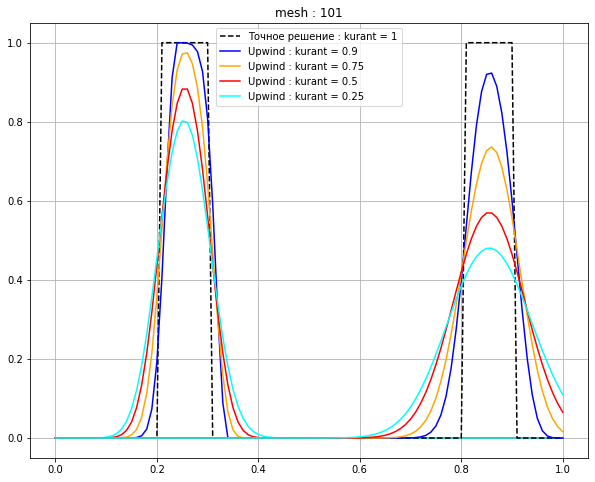

In [5]:
final_time=0.2
fact_v=advection_upwind(v,final_time,1)
new_v_0_50=advection_upwind(v,final_time,0.5)
new_v_0_75=advection_upwind(v,final_time,0.75)
new_v_0_90=advection_upwind(v,final_time,0.90)
new_v_0_25=advection_upwind(v,final_time,0.25)
plt.figure(figsize=(10,8))
plt.plot(l,fact_v,'--',label='Точное решение : kurant = 1',color='black')
plt.plot(l,new_v_0_90,label=r'Upwind : kurant = 0.9',color='blue')
plt.plot(l,new_v_0_75,label=r'Upwind : kurant = 0.75',color='orange')
plt.plot(l,new_v_0_50,label=r'Upwind : kurant = 0.5',color='red')
plt.plot(l,new_v_0_25,label=r'Upwind : kurant = 0.25',color='cyan')
plt.legend()
plt.title(fr'mesh : {n}')

final_time=0.8
fact_v=advection_upwind(v,final_time,1.0)
new_v_0_50=advection_upwind(v,final_time,0.5)
new_v_0_75=advection_upwind(v,final_time,0.75)
new_v_0_90=advection_upwind(v,final_time,0.90)
new_v_0_25=advection_upwind(v,final_time,0.25)
# plt.figure(figsize=(10,8))
plt.plot(l,fact_v,'--',label='Точное решение : kurant = 1',color='black')
plt.plot(l,new_v_0_90,label=r'Upwind : kurant = 0.9',color='blue')
plt.plot(l,new_v_0_75,label=r'Upwind : kurant = 0.75',color='orange')
plt.plot(l,new_v_0_50,label=r'Upwind : kurant = 0.5',color='red')
plt.plot(l,new_v_0_25,label=r'Upwind : kurant = 0.25',color='cyan')
plt.grid()

# Generate data (train+test)

In [6]:
generate_flg=True # True - генерация, False - чтение уже сгенерированных
# generate_flg=False

n=101
L=1
T=.8
kurant=0.9

h=L/(n-1)
b=(n-1)*0.1*L #width % of L
l=[i/(n-1) for i in range(0,n)]
v=[1 if i in range(1,int(b)+1) else 0 for i in range(0,n) ]
print('Доля единиц:',np.round(100*v.count(1)/len(v),3))

tau=kurant*h
# tau=1e-4
print(tau)
time_lst=[i for i in np.arange(0,T,tau)]

Доля единиц: 9.901
0.009000000000000001


In [7]:
print('h',h,h**2)
print('tau',tau)
assert tau/h<1,'не выполнено ограничение на число Куранта'
# assert tau<=h**2,'не выполнено условие CFL'

h 0.01 0.0001
tau 0.009000000000000001


In [8]:
if generate_flg:
    v_fact=[]
    for t in tqdm(time_lst):
        v_fact.append(advection_upwind(v,t,1))
    v=np.array(v)
    v_fact=np.array(v_fact)
    x_lst=np.linspace(0,L,num=n)

    #save
    np.savetxt(fr'data/advection_v_fact_tau={tau}_n={n}.csv',v_fact,delimiter=',')
    print('data: Сохранил в файл')

else:
    try:
        v_fact=np.array(pd.read_csv(fr'data/advection_v_fact_tau={tau}_n={n}.csv',header=None))
        x_lst=np.linspace(0,L,num=n)
        print('data: Считал с файла')
    except:
        print('Нет файла!')
    
print(len(v_fact),len(v_fact[0]))
v_fact=v_fact.T
print(len(v_fact),len(v_fact[0]))

100%|█████████████████████████████████████████████████████████████████████████████████| 89/89 [00:00<00:00, 713.00it/s]

data: Сохранил в файл
89 101
101 89


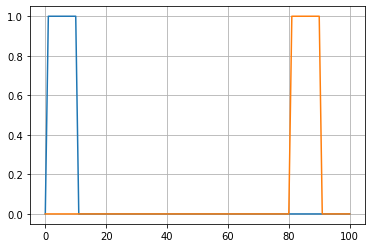

In [9]:
#view
plt.plot(v_fact[:,0])
# plt.plot(v_fact[:,4000])
plt.plot(v_fact[:,-1])
plt.grid()

# Stencil-NET

In [10]:
import torch
import torch.nn as nn

from torch.optim import Adam
from torch.optim.lr_scheduler import ExponentialLR
from stencilnet import MLPConv, forward_rk3_error, backward_rk3_error,backward_rk3_tvd_error,forward_rk3_tvd_error
from stencilnet import forward_rk1_error,backward_rk1_error
from utils import load_simulation_model


In [11]:
Tsim=len(v_fact[0])

### Subsample Solution Data

In [12]:
t_factor = 2  # time subsample factor 
s_factor = 2   # space subsample factor

dxc = s_factor*h
dtc = t_factor*tau

coarse_t = np.arange(0, Tsim, t_factor)
coarse_x = np.arange(0, n, s_factor)

v_coarse=np.zeros((len(coarse_x),len(coarse_t)))
for i,_x in enumerate(coarse_t):
    v_coarse[:,i]=v_fact[coarse_x,coarse_t[i]].real

In [13]:
print(v_coarse.shape)

(51, 45)


In [14]:
len(x_lst),v_fact.shape

(101, (101, 89))

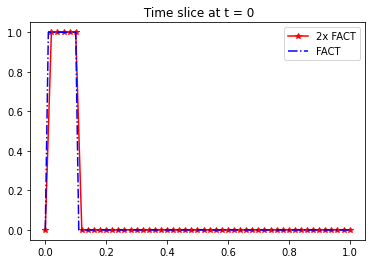

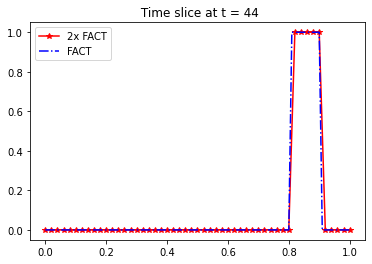

In [15]:
time=0 #first time
plt.figure()
plt.title(" Time slice at t = " + str(time))
plt.plot(x_lst[coarse_x],v_coarse[:,time],'-*',color='red',label=str(s_factor) + 'x FACT')
plt.plot(x_lst,v_fact[:,t_factor*time],'-.',color='blue',label='FACT')
plt.legend()

time=v_coarse.shape[1]-1 #last time
plt.figure()
plt.title(" Time slice at t = " + str(time))
plt.plot(x_lst[coarse_x],v_coarse[:,time],'-*',color='red',label=str(s_factor) + 'x FACT')
plt.plot(x_lst,v_fact[:,t_factor*time],'-.',color='blue',label='FACT')
plt.legend()

In [16]:
# define training data
# оставляю 70% на train
v_coarse_train = v_coarse[:, :int(v_coarse.shape[1]*0.7)]
v_coarse_test = v_coarse[:, int(v_coarse.shape[1]*0.7):]
print('full_sample',v_coarse.shape)
print('train',v_coarse_train.shape)
print('test',v_coarse_test.shape)
Lxc, Ltc = v_coarse_train.shape

full_sample (51, 45)
train (51, 31)
test (51, 14)


### Training Model

In [64]:
# size of filter to be applied
fs = 7
# number of timesteps to be predicted during training 
m = 4
# decaying weights
decay_const = 0.9

epochs=200

l_wd= 1e-7#1e-3 #для loss функции

In [65]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [66]:
v_train = torch.tensor(v_coarse_train.T, requires_grad=True, dtype=torch.float, device=device)

In [67]:
seed = 1

np.random.seed(seed)
torch.manual_seed(seed)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# 64, 64,
net       = MLPConv([fs,64,64, 64, 1], seed=seed, fs=fs, activation=nn.ELU()).to(device)
params    = [{'params': net.parameters(), 'lr': 1e-3}]
optimizer = Adam(params)
scheduler = ExponentialLR(optimizer, .9998)

print("#parameters:", sum(p.numel() for p in net.parameters() if p.requires_grad))

# decaying weights for accumulating prediction error
output_weights = [decay_const**j for j in range(m+1)] 
wd = torch.tensor(output_weights, dtype=torch.float32, device=device)


pbar = tqdm(range(epochs))
for epoch in pbar:
    optimizer.zero_grad()
    
    # compute forward and backward prediction errors
    fwd = forward_rk3_error(net, v_train, dtc, m, wd)
    bwd = backward_rk3_error(net, v_train, dtc, m, wd)
    # fwd=forward_rk3_tvd_error(net, v_train, dtc, m, wd)
    # bwd=backward_rk3_tvd_error(net, v_train, dtc, m, wd)
    
    
    #my_add rk1
    # fwd = forward_rk1_error(net, v_train, dtc, m, wd)
    # bwd = backward_rk1_error(net, v_train, dtc, m, wd)
    
    # compute norm of weights
    res_w = 0
    for i in range(len(net.layer)):
        W = net.layer[i].weight
        W = W.view(W.shape[0]*W.shape[1], -1)
        res_w = res_w + (torch.norm(W, p=2, dim=0)**2)
        
    loss =  fwd + bwd + l_wd*res_w
    
    loss.backward()
    optimizer.step()
    
    if epoch > 15_000:
        scheduler.step()
        
    pbar.set_postfix(loss=round(loss.item(), 7))
    

input 7 output 64
input 64 output 64
input 64 output 64
input 64 output 1
#parameters: 8897


100%|████████████████████████████████████████████████████████████████████| 200/200 [01:24<00:00,  2.36it/s, loss=0.111]


In [68]:
# neurons = 64
# torch.save(net, './models/model_advection_n=' +str(n)+'_'+ str(fs) + "_"+str(t_factor) +'L_' + str(neurons) + '_ep_' + str(epochs)  + '_' + "elu" + '_m' + str(m) + '_Lxc' +  str(s_factor) + "_Ltc" + str(t_factor) +  '_lwd' + str(l_wd) +'_WDactRK1_seed_'+ str(seed)  + '.pth')

### Load model

In [69]:
# neurons = 64
# fs=7
# epochs=100
# m=4
# l_wd=0#1e-3
# seed=1

# net = load_simulation_model(s_factor, t_factor, neurons, device)

# net=torch.load('./models/model_advection_n=' +str(n)+'_' + str(fs) + "_"+str(t_factor) +'L_' + str(neurons) + '_ep_' + str(epochs)  + '_' + "elu" + '_m' + str(m) + '_Lxc' +  str(s_factor) + "_Ltc" + str(t_factor) +  '_lwd' + str(l_wd) +'_WDactRK3_seed_'+ str(seed)  + '.pth')

In [70]:
net.parameters

<bound method Module.parameters of MLPConv(
  (sig): ELU(alpha=1.0)
  (layer): ModuleList(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1-2): 2 x Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=1, bias=True)
  )
)>

### Simulation using STENCIL-NET

In [71]:
v_coarse.shape

(51, 45)

In [72]:
# Lx_sim = int(n/s_factor)
Lx_sim=v_coarse.shape[0]
x_sim  = np.linspace(0,L,Lx_sim)
dxs    = x_sim[1] - x_sim[0]
dts    = dtc
T_sim=v_coarse.shape[1]

NN_sim   = np.zeros((Lx_sim,T_sim))
phase_NN=np.zeros((Lx_sim,T_sim))

# NN_sim[:,0] = np.exp(-(x_sim-3)**2)
NN_sim[:,0]=v_coarse[:,0]

zf   = 0
time = 0
for j in tqdm(range(0,T_sim-1)):
    tensor = NN_sim[:,j].reshape(1,Lxc)
    torch_tensor = torch.tensor(tensor,dtype=torch.float,device=device)
    
    phase_NN[:,j] = net(torch_tensor).cpu().data.numpy()
    k1   =  dts*phase_NN[:,j] #+ dts*forcing
    temp =  NN_sim[:,j] + 0.5*k1 
    
    tensor = temp.reshape(1,Lxc)
    torch_tensor = torch.tensor(tensor,dtype=torch.float,device=device)
    

    k2   =  dts*net(torch_tensor).cpu().data.numpy() #+ dts*forcing
    temp =  NN_sim[:,j] - k1 + 2.0*k2
    
    tensor = temp.reshape(1,Lxc)
    torch_tensor = torch.tensor(tensor,dtype=torch.float,device=device)
    
    k3   =  dts*net(torch_tensor).cpu().data.numpy() #+ dts*forcing
    
    NN_sim[:,j+1] = NN_sim[:,j] + (1./6.)*(k1 + 4.0*k2 + k3)
    
    time = time + dts

# for j in tqdm(range(0,T_sim-1)):
#     tensor = NN_sim[:,j].reshape(1,Lxc)
#     torch_tensor = torch.tensor(tensor,dtype=torch.float,device=device)
    
#     phase_NN[:,j] = net(torch_tensor).cpu().data.numpy()
    
#     NN_sim[:,j+1] = NN_sim[:,j]+dts*phase_NN[:,j]
    
#     time = time + dts

100%|█████████████████████████████████████████████████████████████████████████████████| 44/44 [00:00<00:00, 210.04it/s]


In [73]:
len(phase_NN),len(phase_NN[0])

(51, 45)

In [74]:
h,x_sim[1] - x_sim[0]

(0.01, 0.02)

In [75]:
NN_sim.shape

(51, 45)

In [76]:
len(v_coarse),len(x_sim)

(51, 51)

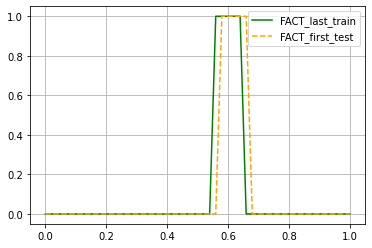

In [77]:
plt.plot(x_sim,v_coarse_train[:,-1],'-',color='green',label='FACT_last_train')
plt.plot(x_sim,v_coarse_test[:,0],'--',color='orange',label='FACT_first_test')
plt.legend()
plt.grid()

In [78]:
print(net.noise)

None


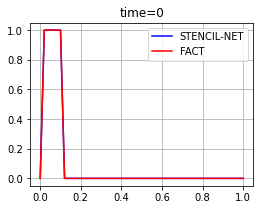

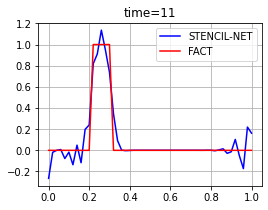

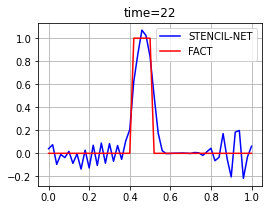

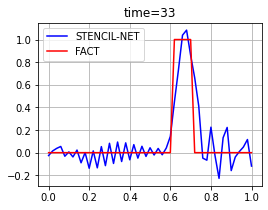

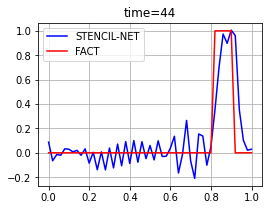

In [79]:
time=[int(i) for i in np.linspace(0,T_sim-1,5)]
for time in time:
    plt.figure(figsize=(4,3))
    plt.title(fr'time={time}')
    plt.plot(x_sim,NN_sim[:,time],'-',color='blue',label='STENCIL-NET')
    plt.plot(x_sim,v_coarse[:,time],color='red', label='FACT')
    plt.grid()
    plt.legend()

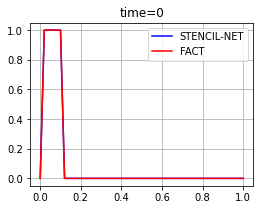

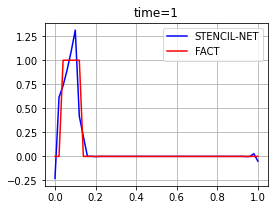

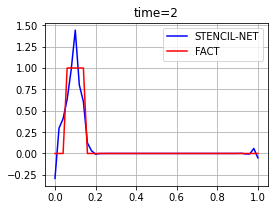

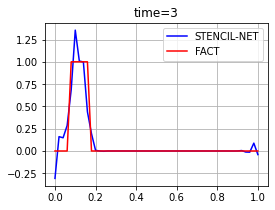

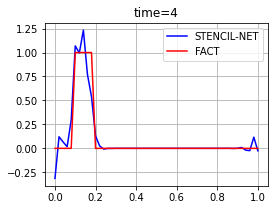

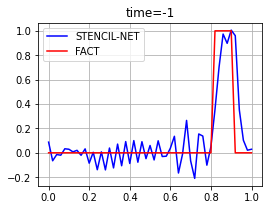

In [80]:
time=[0,1,2,3,4,-1]
# time[-1]=time[-1]-1
for time in time:
    plt.figure(figsize=(4,3))
    plt.title(fr'time={time}')
    plt.plot(x_sim,NN_sim[:,time],'-',color='blue',label='STENCIL-NET')
    plt.plot(x_sim,v_coarse[:,time],color='red', label='FACT')
    plt.grid()
    plt.legend()